## Keras -- MLPs on MNIST

In [0]:
# Checking if GPU is available
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12961759298813835808
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7259935812420886672
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10587928147365517172
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13036516148
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5943975532915389494
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
# Mouting Google drive to save our trained models
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal  # weight initializer

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10                
input_dim = X_train.shape[1]   # passed to the first hidden layer specifying the number of inputs it should expect

batch_size = 128 
nb_epoch = 20

**Input -> Softmax:**

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

W0804 16:31:32.464691 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 16:31:32.470091 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 16:31:32.474256 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


W0804 16:31:32.505516 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 16:31:32.528835 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0804 16:31:32.617900 139651759564672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 16:31:32.658567 139651759564672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 1.2731 - acc: 0.7043 - val_loss: 0.8063 - val_acc: 0.8367
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.7110 - acc: 0.8448 - val_loss: 0.6050 - val_acc: 0.8658
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5838 - acc: 0.8609 - val_loss: 0.5247 - val_acc: 0.8742
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5231 - acc: 0.8698 - val_loss: 0.4796 - val_acc: 0.8805
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4860 - acc: 0.8757 - val_loss: 0.4499 - val_acc: 0.8858
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4606 - acc: 0.8803 - val_loss: 0.4292 - val_acc: 0.8894
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4418 - acc: 0.8844 - val_loss: 0.4128 - val_acc

**Note:** The keras.evaluate() function will give you the loss value for every batch. The keras.predict() function will give you the actual predictions for all samples in a batch, for all batches. So even if you use the same data, the differences will be there because the value of a loss function will be almost always different than the predicted values. These are two different things.

Test score: 0.3362268351316452
Test accuracy: 0.9087


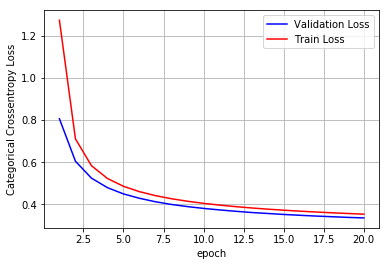

In [0]:
%matplotlib inline
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [0]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 2.2726 - acc: 0.2015 - val_loss: 2.2266 - val_acc: 0.3424
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 2.1825 - acc: 0.4357 - val_loss: 2.1259 - val_acc: 0.4958
Epoch 3/20
60000/60000 [==============================] - 2s 26us/step - loss: 2.0662 - acc: 0.5613 - val_loss: 1.9858 - val_acc: 0.6221
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.9039 - acc: 0.6235 - val_loss: 1.7950 - val_acc: 0.6902
Epoch 5/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.6967 - acc: 0.6728 - val_loss: 1.5688 - val_acc: 0.7118
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.4701 - acc: 0.7121 - val_loss: 1.3422 - val_acc: 0.7296
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.2590 - acc: 0.7438 - val_loss: 1.1481 - val_acc

Test score: 0.4583240813970566
Test accuracy: 0.8792


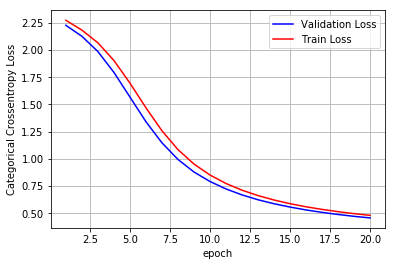

In [0]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

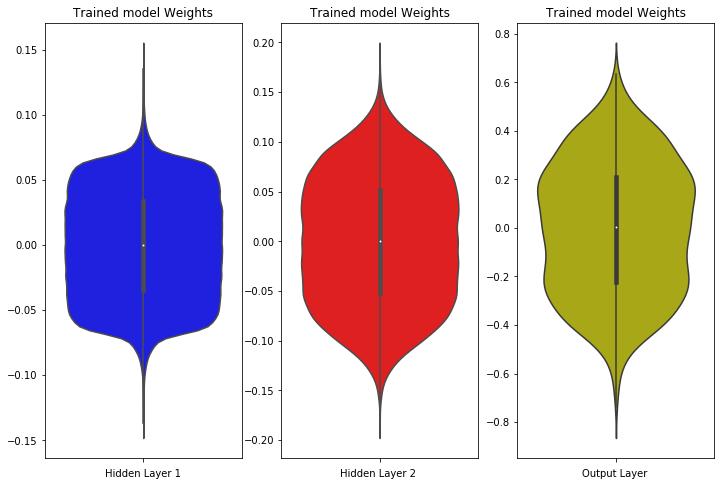

In [0]:
%matplotlib inline
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')

plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [0]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.5409 - acc: 0.8575 - val_loss: 0.2526 - val_acc: 0.9252
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2222 - acc: 0.9349 - val_loss: 0.1831 - val_acc: 0.9450
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - los

Test score: 0.0736692005243589
Test accuracy: 0.9801


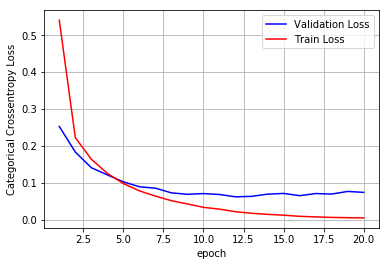

In [0]:
%matplotlib inline
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

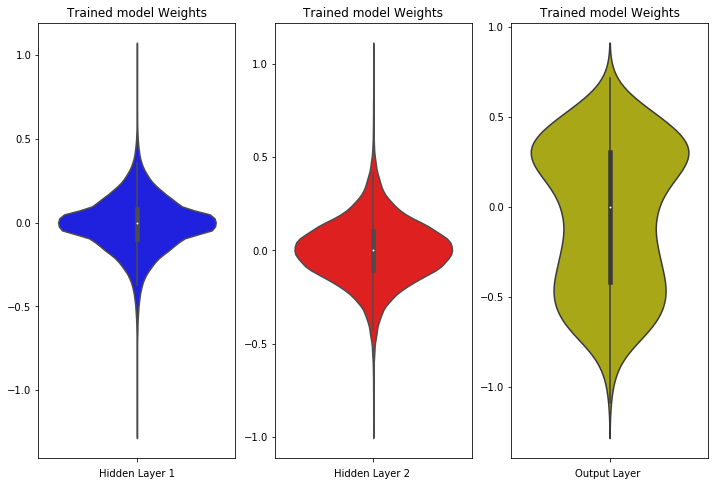

In [0]:
%matplotlib inline
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.7357 - acc: 0.7929 - val_loss: 0.3855 - val_acc: 0.8933
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.3571 - acc: 0.8995 - val_loss: 0.2975 - val_acc: 0.9147
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2938 - acc: 0.9167 - val_loss: 0.2609 - val_acc: 0.9245
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2589 - acc: 0.9259 - val_loss: 0.2372 - val_acc: 0.9326
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2349 - acc: 0.9331 - val_loss: 0.2169 - val_acc: 0.9370
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2166 - acc: 0.9385 - val_loss: 0.2035 - val_acc: 0.9416
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2015 - acc: 0.9425 - val_loss: 0.1906 - val_acc

Test score: 0.12101748173683882
Test accuracy: 0.9644


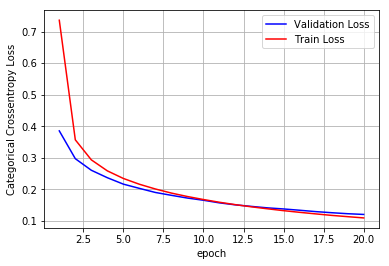

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

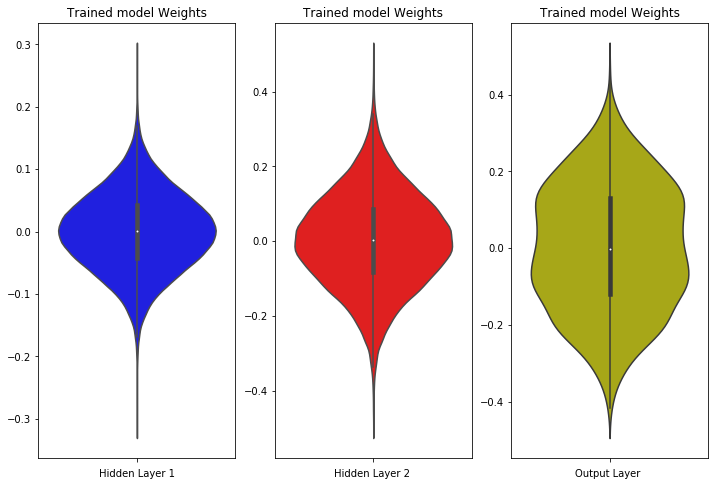

In [0]:
%matplotlib inline
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.2257 - acc: 0.9323 - val_loss: 0.1141 - val_acc: 0.9634
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0841 - acc: 0.9741 - val_loss: 0.0790 - val_acc: 0.9759
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step 

Test score: 0.09506532158235209
Test accuracy: 0.9796


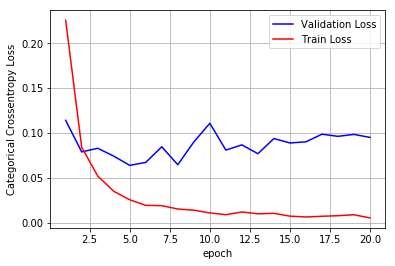

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

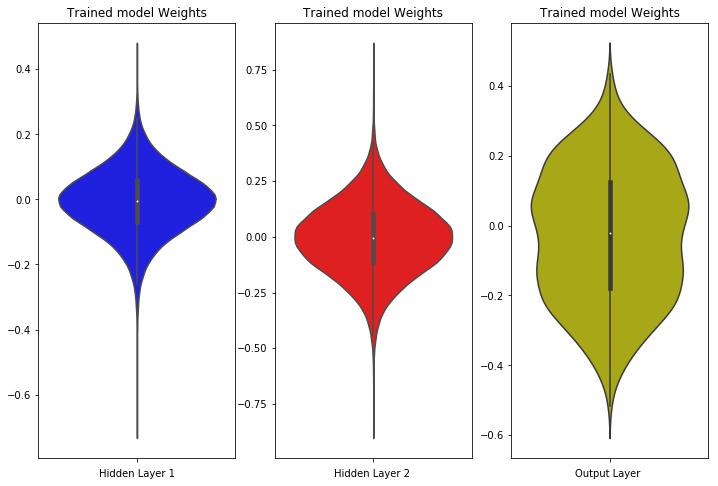

In [0]:
%matplotlib inline
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.3042 - acc: 0.9093 - val_loss: 0.2186 - val_acc: 0.9327
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1785 - acc: 0.9474 - val_loss: 0.1755 - val_acc: 0.9468
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1385 - acc: 0.9595 - val_loss: 0.1494 - val_acc: 0.9534
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.1130 - acc: 0.9668 - val_loss: 0.1292 - val_acc: 0.9617
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0956 - acc: 0.9711 - val_loss: 0.1328 - val_acc: 0.9597
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0817 - acc: 0.9752 - val_loss: 0.1192 - val_acc: 0.9616
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0704 - acc: 0.9784 - val_loss: 0.1181 - val_acc

Test score: 0.09516252700814512
Test accuracy: 0.9749


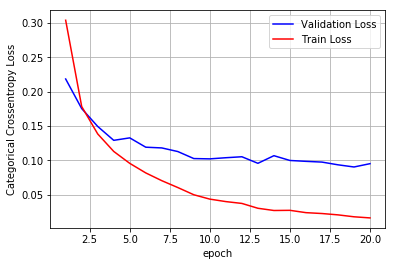

In [0]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

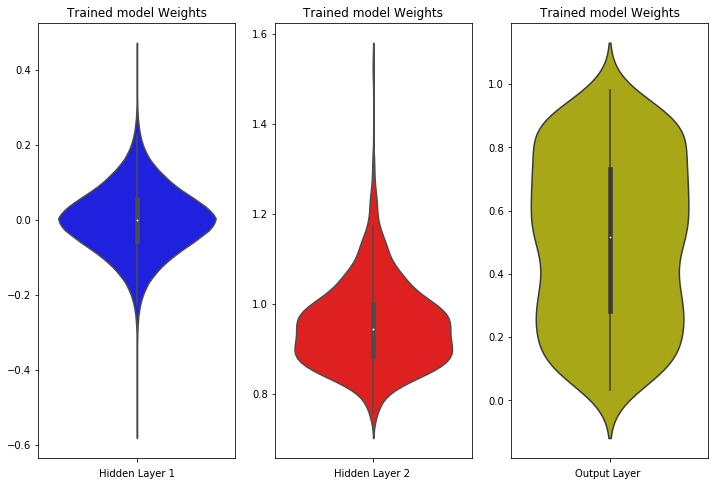

In [0]:
%matplotlib inline
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

W0804 16:35:36.860419 139651759564672 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.6652 - acc: 0.7950 - val_loss: 0.2836 - val_acc: 0.9164
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4251 - acc: 0.8695 - val_loss: 0.2539 - val_acc: 0.9236
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3772 - acc: 0.8852 - val_loss: 0.2323 - val_acc: 0.9309
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3527 - acc: 0.8953 - val_loss: 0.2187 - val_acc: 0.9365
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3349 - acc: 0.8995 - val_loss: 0.2018 - val_acc: 0.9415
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3184 - acc: 0.9046 - val_loss: 0.1969 - val_acc: 0.9428
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3002 - acc: 0.9099 - val_loss: 0.1915 - val_acc

Test score: 0.10577300073988735
Test accuracy: 0.9683


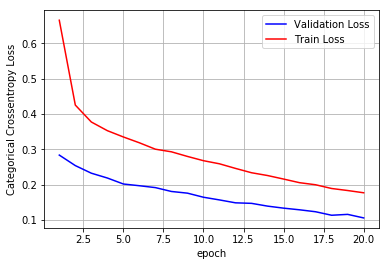

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

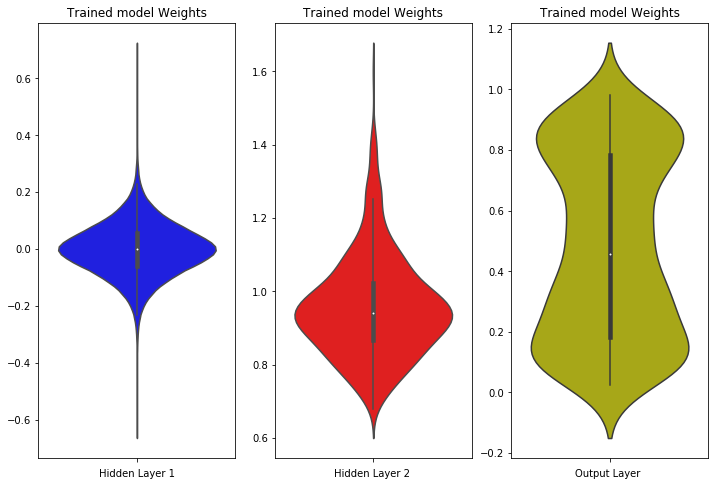

In [0]:
%matplotlib inline
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975817 using {'activ': 'relu'}
0.975017 (0.001059) with: {'activ': 'sigmoid'}
0.975817 (0.002400) with: {'activ': 'relu'}


# With 2 Hiden layers
**Architecture used: 784 (input) - 256 - 64 -  10 (ouput)**

**MLP + ReLu + Adam**

In [0]:
model2_relu = Sequential()

model2_relu.add(Dense(256, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_uniform'))
model2_relu.add(Dense(64, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_uniform'))
model2_relu.add(Dense(output_dim, activation = 'softmax'))

model2_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_43 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_relu.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model2_relu.fit(X_train, Y_train, batch_size= batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2851 - acc: 0.9207 - val_loss: 0.1351 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1053 - acc: 0.9687 - val_loss: 0.1022 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0691 - val_acc: 0.9781
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0507 - acc: 0.9847 - val_loss: 0.0719 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0722 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0306 - acc: 0.9906 - val_loss: 0.0621 - val_acc: 0.9820
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0232 - acc: 0.9927 - val_loss: 0.0688 - val_acc

Test score: 0.10035725422161268
Test accuracy: 0.9788


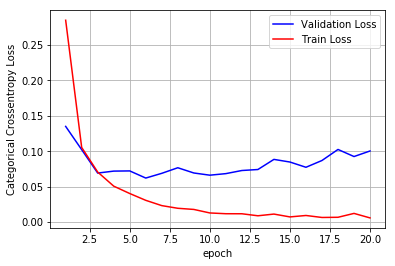

In [0]:
score = model2_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

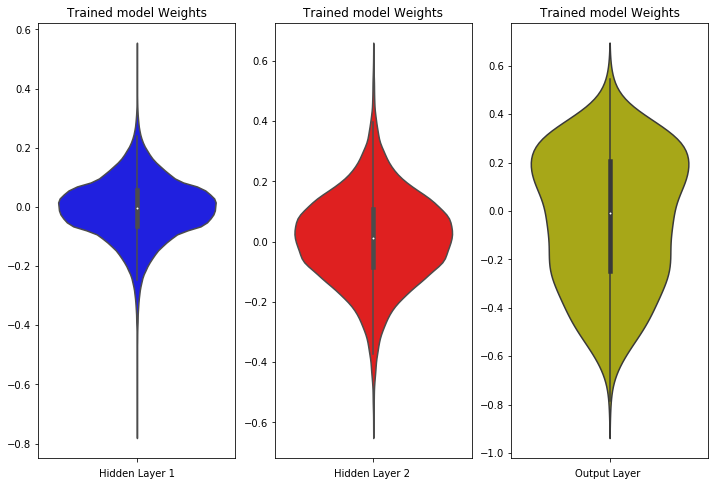

In [0]:
%matplotlib inline
w_after = model2_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + BatchNorm on hidden layers + Adam**

In [0]:
model2_relu_batchnorm = Sequential()

model2_relu_batchnorm.add(Dense(256, activation = 'relu', input_dim = input_dim,kernel_initializer= 'glorot_uniform'))
model2_relu_batchnorm.add(BatchNormalization())

model2_relu_batchnorm.add(Dense(64, activation = 'relu', input_dim = input_dim,kernel_initializer= 'glorot_uniform'))
model2_relu_batchnorm.add(BatchNormalization())

model2_relu_batchnorm.add(Dense(output_dim, activation = 'softmax'))

model2_relu_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________


In [0]:
model2_relu_batchnorm.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model2_relu_batchnorm.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2128 - acc: 0.9386 - val_loss: 0.1270 - val_acc: 0.9603
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0863 - acc: 0.9741 - val_loss: 0.0921 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0560 - acc: 0.9828 - val_loss: 0.0807 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0719 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0305 - acc: 0.9907 - val_loss: 0.0722 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0712 - val_acc: 0.9789
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0685 - val_acc

Test score: 0.08512964024284957
Test accuracy: 0.9786


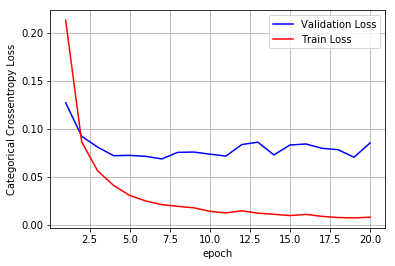

In [0]:
score = model2_relu_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

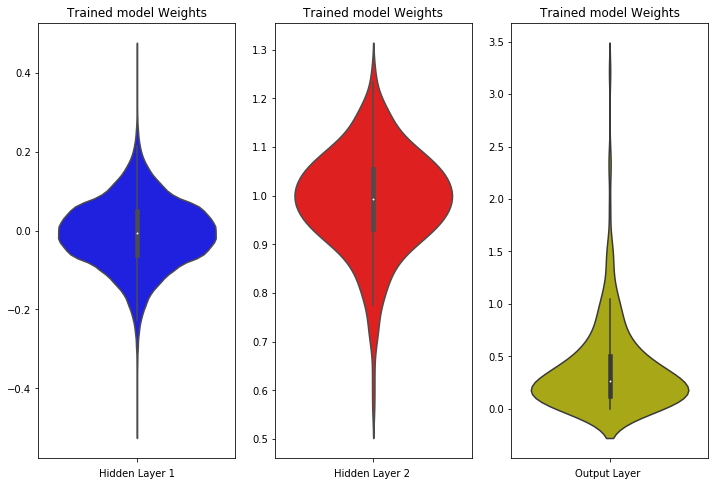

In [0]:
%matplotlib inline
w_after = model2_relu_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize = (12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observation**

After applying normalization, we see that weights in the output layer are mostly between 0.0 to 0.5 and fewer between 0.5 to 1.0

**Note:** I am going to experiment here. First, I will place batch norm before dropout and later I will place dropout before batchnorm. After doing this, I will compare the accuracy of these models.

This is some interesting discussion: 
* https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout
* https://github.com/cvjena/cnn-models/issues/3

**MLP + Batch Norm + Dropout + Adam**

In [0]:
model2_batchnorm_drop = Sequential()

model2_batchnorm_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer='random_normal'))
model2_batchnorm_drop.add(BatchNormalization())
model2_batchnorm_drop.add(Dropout(0.5))

model2_batchnorm_drop.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model2_batchnorm_drop.add(BatchNormalization())
model2_batchnorm_drop.add(Dropout(0.5))

model2_batchnorm_drop.add(Dense(output_dim, activation='softmax'))


model2_batchnorm_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total para

In [0]:
model2_batchnorm_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_batchnorm_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.5546 - acc: 0.8328 - val_loss: 0.1816 - val_acc: 0.9433
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2673 - acc: 0.9218 - val_loss: 0.1269 - val_acc: 0.9590
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2081 - acc: 0.9389 - val_loss: 0.1117 - val_acc: 0.9676
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1789 - acc: 0.9477 - val_loss: 0.1001 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1661 - acc: 0.9516 - val_loss: 0.0845 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1508 - acc: 0.9558 - val_loss: 0.0901 - val_acc: 0.9713
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1371 - acc: 0.9600 - val_loss: 0.0850 - val_acc

Test score: 0.061712297642615155
Test accuracy: 0.9827


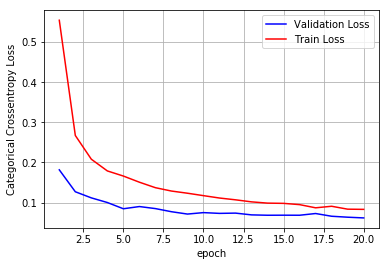

In [0]:
score = model2_batchnorm_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

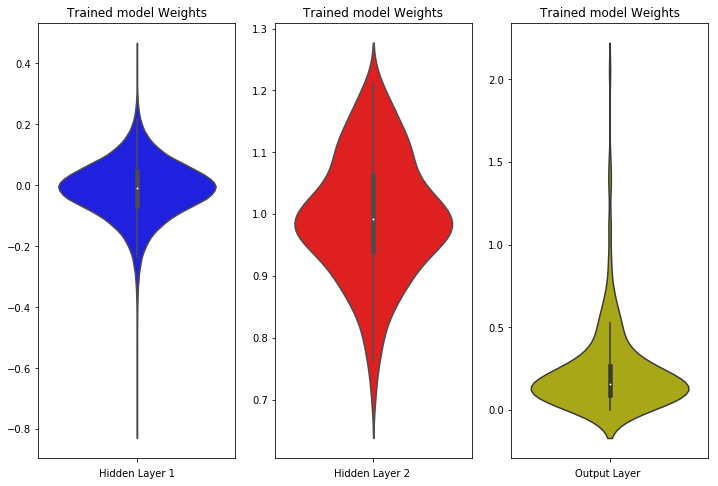

In [0]:
%matplotlib inline
w_after = model2_batchnorm_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize= (12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP +  Dropout + Batch Norm +Adam**

In [0]:
model2_drop_batchnorm = Sequential()

model2_drop_batchnorm.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer='random_normal'))
model2_drop_batchnorm.add(BatchNormalization())
model2_drop_batchnorm.add(Dropout(0.5))

model2_drop_batchnorm.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model2_drop_batchnorm.add(BatchNormalization())
model2_drop_batchnorm.add(Dropout(0.5))

model2_drop_batchnorm.add(Dense(output_dim, activation='softmax'))


model2_drop_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                650       
Total para

In [0]:
model2_drop_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_drop_batchnorm.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.5392 - acc: 0.8366 - val_loss: 0.1746 - val_acc: 0.9465
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2621 - acc: 0.9240 - val_loss: 0.1209 - val_acc: 0.9629
Epoch 3/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2077 - acc: 0.9392 - val_loss: 0.1033 - val_acc: 0.9683
Epoch 4/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1771 - acc: 0.9488 - val_loss: 0.0959 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1600 - acc: 0.9529 - val_loss: 0.0874 - val_acc: 0.9735
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1478 - acc: 0.9562 - val_loss: 0.0842 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1356 - acc: 0.9595 - val_loss: 0.0859 - val_acc

Test score: 0.06602386177739827
Test accuracy: 0.9813


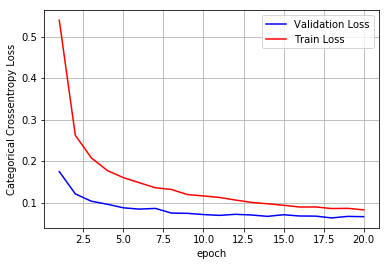

In [0]:
score = model2_drop_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

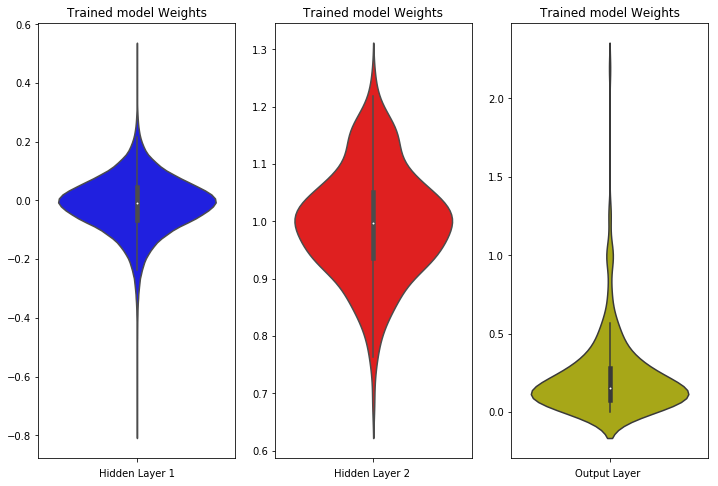

In [0]:
%matplotlib inline
w_after = model2_drop_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize= (12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch Norm + Dropout + Adam

Test score: 0.0703403844089189    
Test accuracy: 0.9796


MLP + Dropout + Batch Norm +Adam

Test score: 0.06499798040131573   
Test accuracy: 0.9817


In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Architecture Type", "Test score", "Test accuracy"]

x.add_row(["MLP + Batch Norm + Dropout + Adam", 0.0703403844089189, 0.9796])
x.add_row(["MLP + Dropout + Batch Norm +Adam", 0.06499798040131573, 0.9817])

print(x)

+-----------------------------------+---------------------+---------------+
|         Architecture Type         |      Test score     | Test accuracy |
+-----------------------------------+---------------------+---------------+
| MLP + Batch Norm + Dropout + Adam |  0.0703403844089189 |     0.9796    |
|  MLP + Dropout + Batch Norm +Adam | 0.06499798040131573 |     0.9817    |
+-----------------------------------+---------------------+---------------+


**Observation:** There is a slight improvement in the test accuracy if we use dropout before batchnorm.

# With 3 Hiden layers
**Architecture used: 784 (input) - 128 - 64 - 32 - 10 (ouput)**

**MLP + ReLu + Adam**

In [0]:
model3_relu = Sequential()

model3_relu.add(Dense(128, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(64, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(32, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(output_dim, activation = 'softmax'))

model3_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_54 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3_relu.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model3_relu.fit(X_train, Y_train, batch_size= batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3343 - acc: 0.9039 - val_loss: 0.1558 - val_acc: 0.9510
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1296 - acc: 0.9618 - val_loss: 0.1152 - val_acc: 0.9641
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0880 - acc: 0.9738 - val_loss: 0.1043 - val_acc: 0.9666
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0691 - acc: 0.9785 - val_loss: 0.0949 - val_acc: 0.9707
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0523 - acc: 0.9841 - val_loss: 0.0811 - val_acc: 0.9758
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0851 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0357 - acc: 0.9888 - val_loss: 0.0760 - val_acc

Test score: 0.12519279713677378
Test accuracy: 0.9748


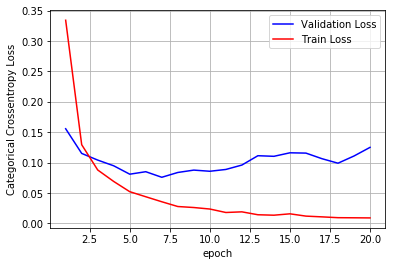

In [0]:
score = model3_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

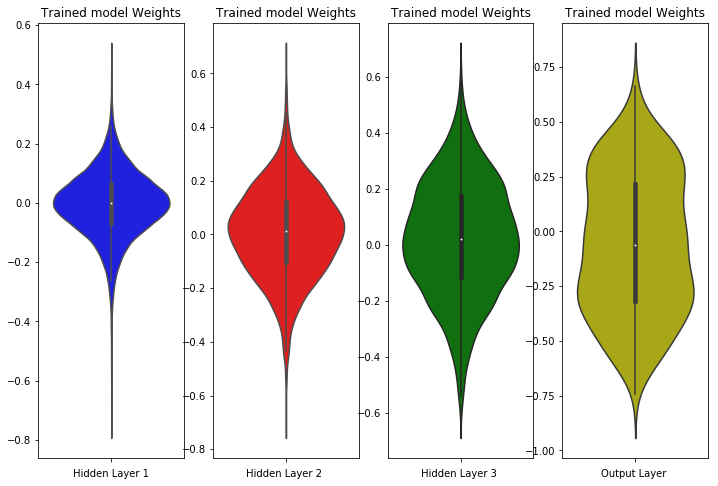

In [0]:
%matplotlib inline
w_after = model3_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + BatchNorm on hidden layers + Adam**

In [0]:
model3_relu_batchnorm = Sequential()

model3_relu_batchnorm.add(Dense(128, activation = 'relu', input_dim = input_dim,kernel_initializer= 'glorot_normal'))
model3_relu_batchnorm.add(BatchNormalization())

model3_relu_batchnorm.add(Dense(64, activation = 'relu', input_dim = input_dim,kernel_initializer= 'glorot_normal'))
model3_relu_batchnorm.add(BatchNormalization())

model3_relu_batchnorm.add(Dense(32, activation = 'relu', input_dim = input_dim,kernel_initializer= 'glorot_normal'))
model3_relu_batchnorm.add(BatchNormalization())

model3_relu_batchnorm.add(Dense(output_dim, activation = 'softmax'))

model3_relu_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32)                128       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                330       
Total para

In [0]:
model3_relu_batchnorm.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model3_relu_batchnorm.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.3190 - acc: 0.9111 - val_loss: 0.1437 - val_acc: 0.9570
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1148 - acc: 0.9657 - val_loss: 0.1025 - val_acc: 0.9703
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0787 - acc: 0.9758 - val_loss: 0.0985 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0600 - acc: 0.9815 - val_loss: 0.0879 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0467 - acc: 0.9860 - val_loss: 0.0918 - val_acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0407 - acc: 0.9868 - val_loss: 0.0961 - val_acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0818 - val_ac

Test score: 0.0946673099771564
Test accuracy: 0.9775


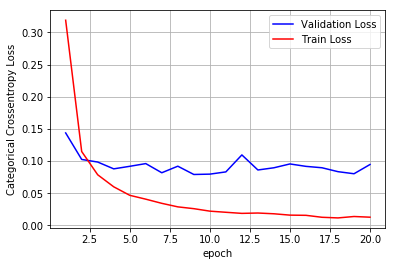

In [0]:
score = model3_relu_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

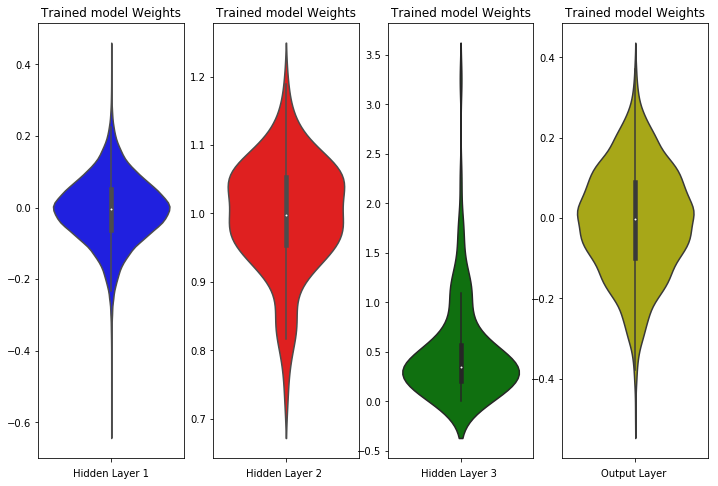

In [0]:
%matplotlib inline
w_after = model3_relu_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize = (12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


**MLP + Dropout + Batch Norm +Adam**

In [0]:
model3_drop_batchnorm = Sequential()

model3_drop_batchnorm.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer='random_uniform'))
model3_drop_batchnorm.add(BatchNormalization())
model3_drop_batchnorm.add(Dropout(0.5))

model3_drop_batchnorm.add(Dense(64, activation='relu', kernel_initializer='random_uniform'))
model3_drop_batchnorm.add(BatchNormalization())
model3_drop_batchnorm.add(Dropout(0.5))

model3_drop_batchnorm.add(Dense(32, activation='relu', kernel_initializer='random_uniform'))
model3_drop_batchnorm.add(BatchNormalization())
model3_drop_batchnorm.add(Dropout(0.5))

model3_drop_batchnorm.add(Dense(output_dim, activation='softmax'))


model3_drop_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 32)                2080      
__________

In [0]:
model3_drop_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3_drop_batchnorm.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.8041 - acc: 0.7578 - val_loss: 0.2195 - val_acc: 0.9324
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3983 - acc: 0.8924 - val_loss: 0.1707 - val_acc: 0.9496
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3370 - acc: 0.9115 - val_loss: 0.1509 - val_acc: 0.9568
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3005 - acc: 0.9211 - val_loss: 0.1393 - val_acc: 0.9594
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2788 - acc: 0.9270 - val_loss: 0.1364 - val_acc: 0.9603
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2564 - acc: 0.9324 - val_loss: 0.1178 - val_acc: 0.9664
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2457 - acc: 0.9359 - val_loss: 0.1181 - val_ac

Test score: 0.10121105482841376
Test accuracy: 0.9715


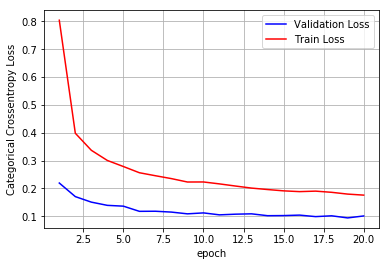

In [0]:
score = model3_drop_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

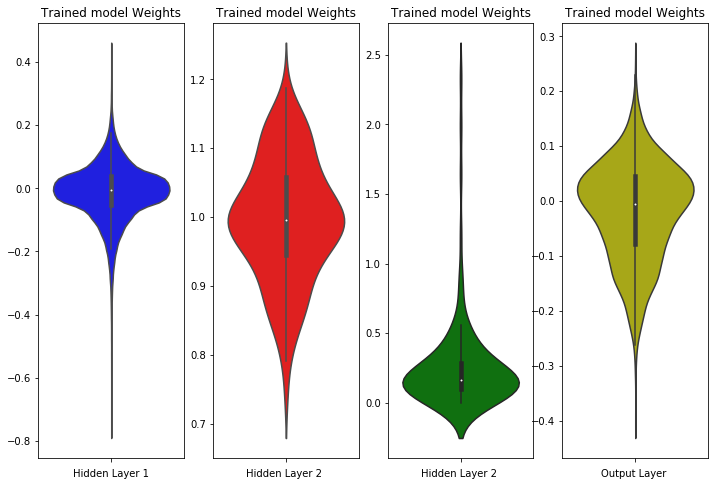

In [0]:
%matplotlib inline
w_after = model3_drop_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize= (12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# With 5 Hidden layers
**Architecture used: 784 (input) - 512 - 256 - 128 - 64 - 32 - 10 (ouput)**

**MLP + ReLu + Adam**

In [0]:
model5_relu = Sequential()

model5_relu.add(Dense(512, activation = 'relu', input_dim = input_dim, kernel_initializer= 'he_normal'))
model5_relu.add(Dense(256, activation = 'relu', input_dim = input_dim, kernel_initializer= 'he_normal'))
model5_relu.add(Dense(128, activation = 'relu', input_dim = input_dim, kernel_initializer= 'he_normal'))
model5_relu.add(Dense(64, activation = 'relu', input_dim = input_dim, kernel_initializer= 'he_normal'))
model5_relu.add(Dense(32, activation = 'relu', input_dim = input_dim, kernel_initializer= 'he_normal'))
model5_relu.add(Dense(output_dim, activation = 'softmax'))

model5_relu.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_66 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_69 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
model5_relu.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model5_relu.fit(X_train, Y_train, batch_size= batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2628 - acc: 0.9210 - val_loss: 0.1135 - val_acc: 0.9661
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0933 - acc: 0.9716 - val_loss: 0.0857 - val_acc: 0.9739
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0617 - acc: 0.9813 - val_loss: 0.0835 - val_acc: 0.9764
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0929 - val_acc: 0.9723
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0364 - acc: 0.9884 - val_loss: 0.0881 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0292 - acc: 0.9904 - val_loss: 0.0666 - val_acc: 0.9797
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0764 - val_acc

Test score: 0.10761469807939465
Test accuracy: 0.9777


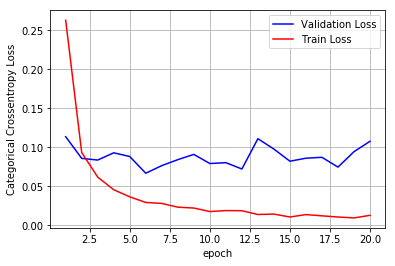

In [0]:
score = model5_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

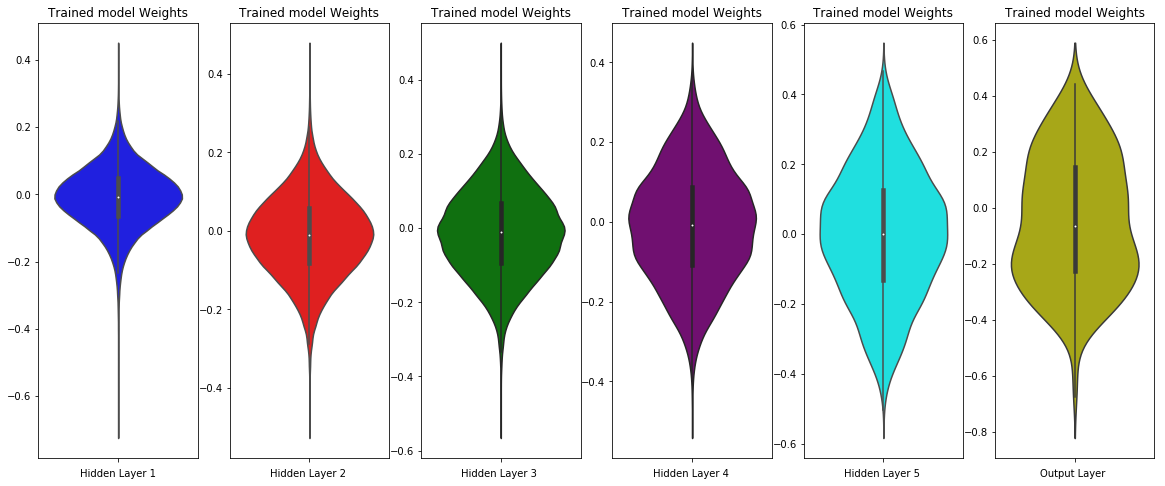

In [0]:
%matplotlib inline
w_after = model5_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='purple')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='cyan')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + BatchNorm on hidden layers + Adam**

In [0]:
model5_relu_batchnorm = Sequential()

model5_relu_batchnorm.add(Dense(512, activation = 'relu', input_dim = input_dim,kernel_initializer= 'he_uniform'))
model5_relu_batchnorm.add(BatchNormalization())


model5_relu_batchnorm.add(Dense(256, activation = 'relu', input_dim = input_dim,kernel_initializer= 'he_uniform'))
model5_relu_batchnorm.add(BatchNormalization())


model5_relu_batchnorm.add(Dense(128, activation = 'relu', input_dim = input_dim,kernel_initializer= 'he_uniform'))
model5_relu_batchnorm.add(BatchNormalization())


model5_relu_batchnorm.add(Dense(64, activation = 'relu', input_dim = input_dim,kernel_initializer= 'he_uniform'))
model5_relu_batchnorm.add(BatchNormalization())


model5_relu_batchnorm.add(Dense(32, activation = 'relu', input_dim = input_dim,kernel_initializer= 'he_uniform'))
model5_relu_batchnorm.add(BatchNormalization())


model5_relu_batchnorm.add(Dense(output_dim, activation = 'softmax'))

model5_relu_batchnorm.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dense_72 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
__________

In [0]:
model5_relu_batchnorm.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model5_relu_batchnorm.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2496 - acc: 0.9307 - val_loss: 0.1209 - val_acc: 0.9630
Epoch 2/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0899 - acc: 0.9733 - val_loss: 0.0893 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0632 - acc: 0.9800 - val_loss: 0.1019 - val_acc: 0.9704
Epoch 4/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.0504 - acc: 0.9842 - val_loss: 0.0886 - val_acc: 0.9735
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0748 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0346 - acc: 0.9883 - val_loss: 0.0799 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0301 - acc: 0.9900 - val_loss: 0.0952 - val_ac

Test score: 0.08212392491589125
Test accuracy: 0.981


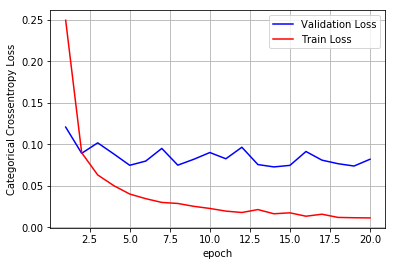

In [0]:
score = model5_relu_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

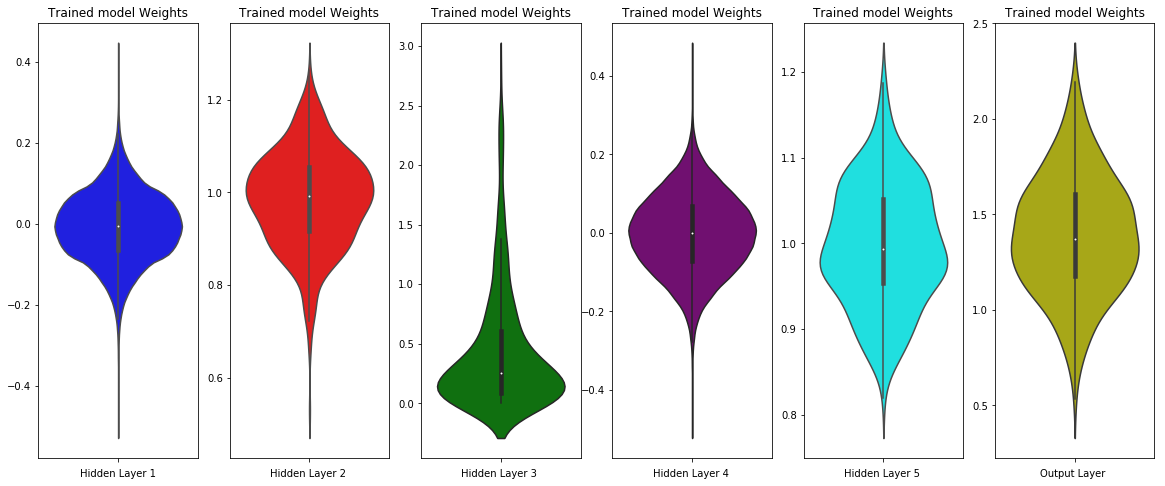

In [0]:
%matplotlib inline
w_after = model5_relu_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='purple')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='cyan')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + Dropout + Batch Norm +Adam**

In [0]:
model5_drop_batchnorm = Sequential()

model5_drop_batchnorm.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(output_dim, activation='softmax'))

model5_drop_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               32896     
__________

In [0]:
model5_drop_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5_drop_batchnorm.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 1.4684 - acc: 0.5186 - val_loss: 0.3500 - val_acc: 0.9124
Epoch 2/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.6071 - acc: 0.8267 - val_loss: 0.1998 - val_acc: 0.9451
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.4087 - acc: 0.8955 - val_loss: 0.1712 - val_acc: 0.9553
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.3354 - acc: 0.9188 - val_loss: 0.1467 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2902 - acc: 0.9311 - val_loss: 0.1325 - val_acc: 0.9671
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2676 - acc: 0.9374 - val_loss: 0.1239 - val_acc: 0.9691
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2399 - acc: 0.9430 - val_loss: 0.1128 - val_ac

Test score: 0.08293465451768134
Test accuracy: 0.98


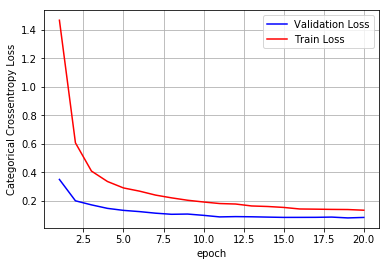

In [0]:
score = model5_drop_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


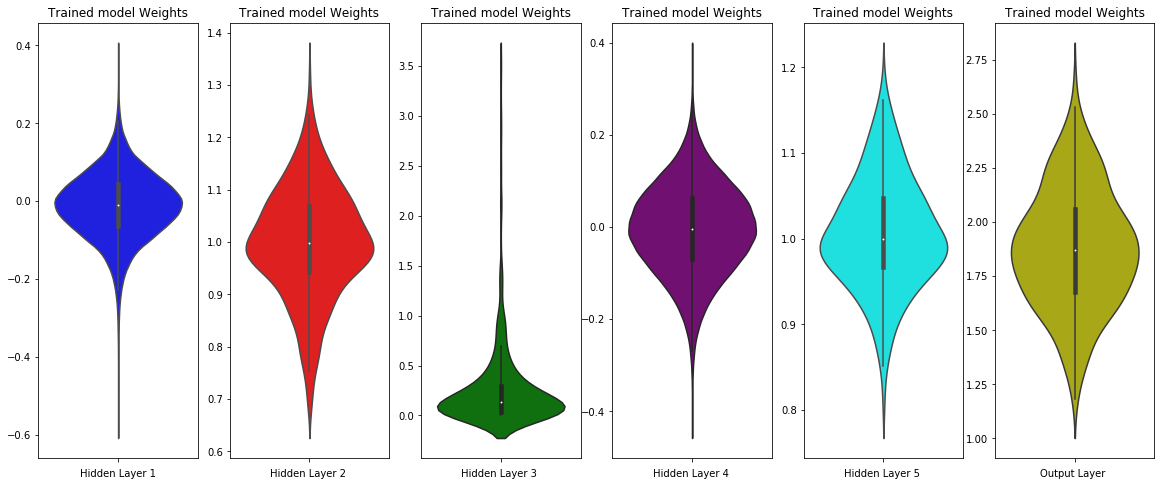

In [0]:
%matplotlib inline
w_after = model5_drop_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='purple')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='cyan')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + ReLu + RMSprop**

In [0]:
model2_relu = Sequential()

model2_relu.add(Dense(256, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_uniform'))
model2_relu.add(Dense(64, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_uniform'))
model2_relu.add(Dense(output_dim, activation = 'softmax'))

model2_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_84 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_85 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2_relu.compile(optimizer = 'RMSprop', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model2_relu.fit(X_train, Y_train, batch_size= batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2732 - acc: 0.9207 - val_loss: 0.1480 - val_acc: 0.9533
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.1059 - acc: 0.9677 - val_loss: 0.0837 - val_acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0710 - acc: 0.9784 - val_loss: 0.0902 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0524 - acc: 0.9839 - val_loss: 0.0674 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0405 - acc: 0.9877 - val_loss: 0.0686 - val_acc: 0.9796
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0314 - acc: 0.9904 - val_loss: 0.0749 - val_acc: 0.9791
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0726 - val_acc

Test score: 0.0998641132327826
Test accuracy: 0.9833


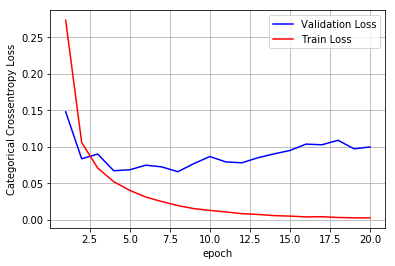

In [0]:
score = model2_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
%matplotlib inline
w_after = model2_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + ReLu + Adadelta**

In [0]:
model3_relu = Sequential()

model3_relu.add(Dense(128, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(64, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(32, activation = 'relu', input_dim = input_dim, kernel_initializer= 'glorot_normal'))
model3_relu.add(Dense(output_dim, activation = 'softmax'))

model3_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_87 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_89 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3_relu.compile(optimizer = 'Adadelta', metrics = ['accuracy'], loss = 'categorical_crossentropy')

history = model3_relu.fit(X_train, Y_train, batch_size= batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.3476 - acc: 0.8968 - val_loss: 0.1580 - val_acc: 0.9529
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1320 - acc: 0.9609 - val_loss: 0.1127 - val_acc: 0.9636
Epoch 3/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0906 - acc: 0.9723 - val_loss: 0.0882 - val_acc: 0.9725
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0878 - val_acc: 0.9737
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0550 - acc: 0.9834 - val_loss: 0.0809 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0442 - acc: 0.9864 - val_loss: 0.0777 - val_acc: 0.9772
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0752 - val_acc

Test score: 0.09183809580091215
Test accuracy: 0.9791


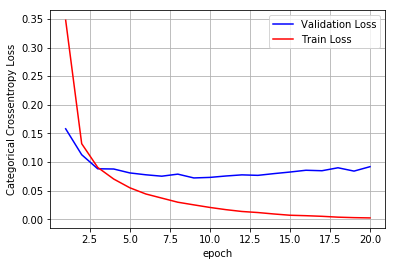

In [0]:
score = model3_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

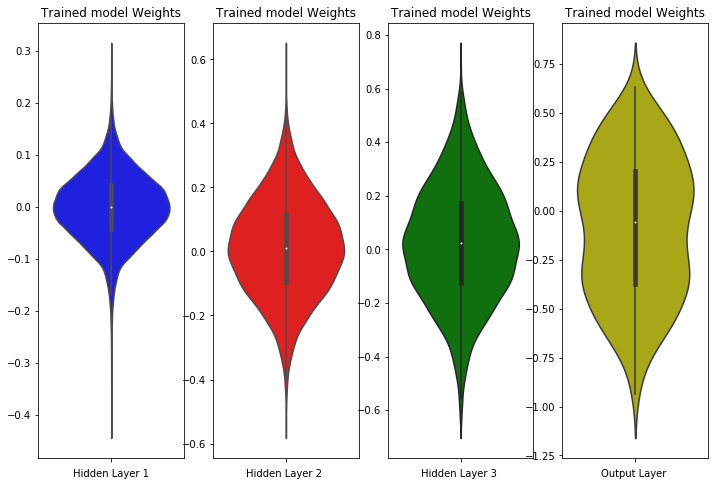

In [0]:
%matplotlib inline
w_after = model3_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP + Dropout + Batch Norm + Nadam**

In [0]:
model5_drop_batchnorm = Sequential()

model5_drop_batchnorm.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model5_drop_batchnorm.add(BatchNormalization())
model5_drop_batchnorm.add(Dropout(0.5))

model5_drop_batchnorm.add(Dense(output_dim, activation='softmax'))

model5_drop_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               32896     
__________

In [0]:
model5_drop_batchnorm.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model5_drop_batchnorm.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 1.1588 - acc: 0.6263 - val_loss: 0.2429 - val_acc: 0.9330
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.4527 - acc: 0.8792 - val_loss: 0.1712 - val_acc: 0.9536
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.3354 - acc: 0.9165 - val_loss: 0.1522 - val_acc: 0.9614
Epoch 4/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2882 - acc: 0.9307 - val_loss: 0.1282 - val_acc: 0.9681
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2559 - acc: 0.9388 - val_loss: 0.1190 - val_acc: 0.9695
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2396 - acc: 0.9440 - val_loss: 0.1110 - val_acc: 0.9722
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2223 - acc: 0.9491 - val_loss: 0.1076 - va

Test score: 0.08949376999950036
Test accuracy: 0.9794


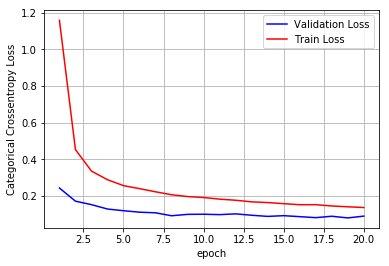

In [0]:
score = model5_drop_batchnorm.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


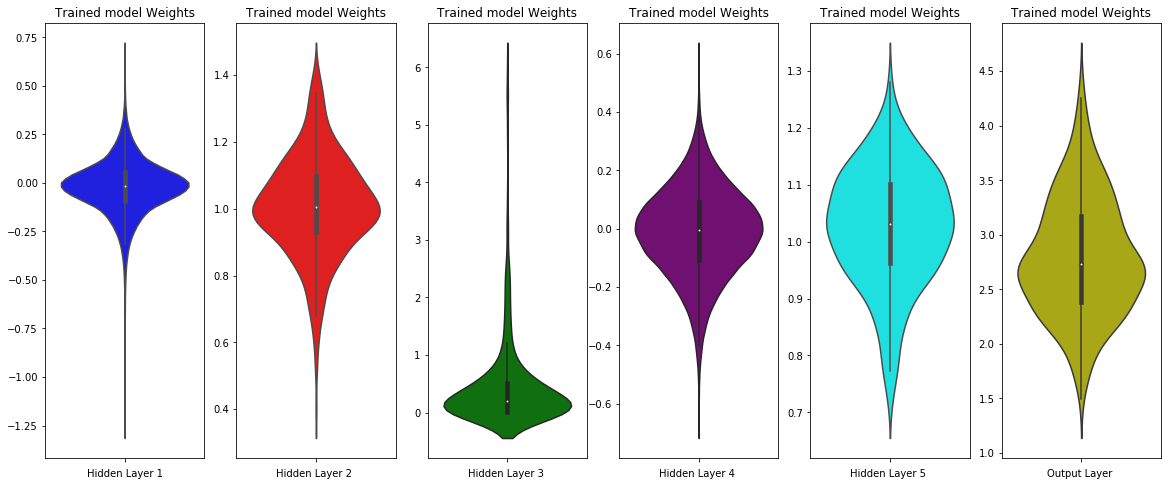

In [0]:
%matplotlib inline
w_after = model5_drop_batchnorm.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='purple')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='cyan')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Summary:

1. Experiemented different MLP architectures on the MNIST dataset:
    * 2 hidden layers - 784 (input) - 256 - 64 - 10 (ouput)
    * 3 hidden layers - 784 (input)  - 128 - 64 - 32- 10 (output)
    * 5 hidden layers - 784 (input) -  512 - 256 - 128 - 64 - 32 -  10 (output)
    
    
 2. Initialized diffferent weight vectors using:
   * glorot-normal
   * glorot-uniform
   * he-normal
   * he-uniform
   * random_normal
   * random_uniform
   
 3. For every architecture, plotted epoch vs loss for training and validation data.
 
 4. For sanity check, plotted violin plots of weights after training the model.
 
 5. Also, performed batch normalization and dropout and it resulted in increase in the accuracy.
 
 6. Conducted a comparison to see what performs better: normbatch before dropout vs dropout before normbatch. Found out dropout before normbatch performed slightly better by looking at the test accuracy. 

In [4]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["No. of layers", "Architecture", "MLP type", "Optimizer", "Test Score", "Test Accuracy"]

x.add_row([2, '784-256-64-10', "MLP + ReLu + Adam", "Adam" , 0.09701326997896285, 0.9795])
x.add_row([2, '784-256-64-10', "MLP + BatchNorm on hidden layers + Adam","Adam", 0.0820598181706071, 0.9799])
x.add_row([2, '784-256-64-10',"MLP + Batch Norm + Dropout + Adam", "Adam", 0.0703403844089189, 0.9796])
x.add_row([2, '784-256-64-10',"MLP + Dropout + Batch Norm +Adam", "Adam",0.06499798040131573, 0.9817])


x.add_row([3, '784-128-64-32-10',"MLP + ReLu + Adam", "Adam", 0.10691093345177942, 0.9765])
x.add_row([3, '784-128-64-32-10',"MLP + BatchNorm on hidden layers + Adam", "Adam", 0.11158925297728202, 0.9762])
x.add_row([3, '784-128-64-32-10',"MLP + Dropout + Batch Norm +Adam","Adam", 0.09398230195709038, 0.9758])

x.add_row([5, '784-512-256-128-64-32-10',"MLP + ReLu + Adam", "Adam" ,0.09024974172847265,0.9824])
x.add_row([5, '784-512-256-128-64-32-10',"MLP + BatchNorm on hidden layers + Adam", "Adam", 0.08782999148442759, 0.9791])
x.add_row([5, '784-512-256-128-64-32-10',"MLP + Dropout + Batch Norm +Adam", "Adam" , 0.07287385137048549, 0.9845])


# models with different optimizers
x.add_row([2, '784-256-64-10',"MLP + ReLu + RMSprop", "RMSprop",0.0998641132327826, 0.9833]) 
x.add_row([3, '784-128-64-32-10',"MLP + ReLu + Adadelta", "Adadelta", 0.09183809580091215, 0.9791])  
x.add_row([5, '784-512-256-128-64-32-10',"MLP + Dropout + Batch Norm + Nadam", "Nadam" , 0.08949376999950036, 0.9794])

print(x)

+---------------+--------------------------+-----------------------------------------+-----------+---------------------+---------------+
| No. of layers |       Architecture       |                 MLP type                | Optimizer |      Test Score     | Test Accuracy |
+---------------+--------------------------+-----------------------------------------+-----------+---------------------+---------------+
|       2       |      784-256-64-10       |            MLP + ReLu + Adam            |    Adam   | 0.09701326997896285 |     0.9795    |
|       2       |      784-256-64-10       | MLP + BatchNorm on hidden layers + Adam |    Adam   |  0.0820598181706071 |     0.9799    |
|       2       |      784-256-64-10       |    MLP + Batch Norm + Dropout + Adam    |    Adam   |  0.0703403844089189 |     0.9796    |
|       2       |      784-256-64-10       |     MLP + Dropout + Batch Norm +Adam    |    Adam   | 0.06499798040131573 |     0.9817    |
|       3       |     784-128-64-32-10   